In [1]:
import os
os.getcwd()

'e:\\machine_learning_projects\\Statistics for Data Science\\Classification'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Classification
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Naive Bayes
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



# Conditional probability
## The probability of observing some event (say, X = i) given some other event (say, Y = i)

# Posterior probability
## The probability of an outcome after the predictor information has been incorporated (in contrast to the prior probability of outcomes, not taking predictor infor‐ mation into account).


## Why is this formula called “naive”? We have made a simplifying assumption that the exact conditional probability of a vector of predictor values, given observing an outcome, is sufficiently well estimated by the product of the individual conditional probabilities P(Xj\Y = i). In other words, in estimating P(Xj\Y = i) instead of P(X1, X2, ⋯Xp\Y = i) , we are assuming Xj is independent of all the other predictor variables Xk for k ≠ j.


# Discriminant Analysis
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Key Terms for Discriminant Analysis
## Covariance-
## A measure of the extent to which one variable varies in concert with another (i.e., similar magnitude and direction).
## Discriminant function- 
## The function that, when applied to the predictor variables, maximizes the separation of the classes.
## Discriminant weights-
## The scores that result from the application of the discriminant function and are used to estimate probabilities of belonging to one class or another.

# Fisher’s Linear Discriminant

## Technically, discriminant analysis assumes the predictor variables are normally distributed continuous variables, but, in practice, the method works well even for nonextreme departures from normality, and for binary predictors.
## LDA is like PCA, but it focuses on maximizimising the separatibility amoung the known categories.

![image](Capture.png)

In [2]:
loan3000 = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Classification\loan3000.csv')
loan3000.head()
X = loan3000.loc[:,['borrower_score',	'payment_inc_ratio']]
y = loan3000.loc[:,['outcome']]

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [4]:
lda.coef_, lda.intercept_

(array([[ 4.92601223, -0.0684245 ]]), array([-1.83566262]))

# Logistic Regression
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# Key Terms for Logistic Regression
## Logit-
## The function that maps class membership probability to a range from ± ∞
## (instead of 0 to 1).
## Synonym
## Log odds (see below)
## Odds-
## The ratio of “success” (1) to “not success” (0).
## Log odds-
## The response in the transformed model (now linear), which gets mapped back to
## a probability.


## The first step is to think of the outcome variable not as a binary label but as the probability p that the label is a “1.” Naively, we might be tempted to model p as a linear function of the predictor variables:
## p = β0+ β1x1+ β2x2+ ⋯ + βqxq
## However, fitting this model does not ensure that p will end up between 0 and 1, as a
## probability must.
## Instead, we model p by applying a logistic response or inverse logit function to the
## predictors:
## p = 1/ (1 + e ^ -(β0+ β1x1+ β2x2+ ⋯ + βqxq))
## This transform ensures that the p stays between 0 and 1.

![image](logit.jpg)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## In Python, we can convert the probabilities into a data frame and use the describe method to get these characteristics of the distribution:


In [6]:
pred = pd.DataFrame(lr.predict_log_proba(X))
pred.describe()

,0,1
count,3000.000000,3000.000000
mean,-0.787560,-0.706896
std,0.353051,0.330448
min,-2.405386,-2.641914
25%,-0.993163,-0.899793
50%,-0.730291,-0.657334
75%,-0.521977,-0.462676
max,-0.073889,-0.094564


In [7]:
pred = pd.DataFrame(lr.predict_proba(X))
pred.describe()

,0,1
count,3000.000000,3000.000000
mean,0.481667,0.518333
std,0.152574,0.152574
min,0.090231,0.071225
25%,0.370403,0.406654
50%,0.481769,0.518231
75%,0.593346,0.629597
max,0.928775,0.909769


# Interpreting the Coefficients and Odds Ratios

In [21]:
loan_data = pd.read_csv('E:\machine_learning_projects\Statistics for Data Science\Classification\loan_data.csv')
#loan_data.head()
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_',
 'borrower_score']
outcome = 'outcome'

X = loan_data.loc[:,predictors]
y = loan_data.loc[:,[outcome]]

In [22]:
X.head()

,payment_inc_ratio,purpose_,home_,emp_len_,borrower_score
0,2.39320,major_purchase,RENT,> 1 Year,0.65
1,4.57170,small_business,OWN,> 1 Year,0.80
2,9.71600,other,RENT,> 1 Year,0.60
3,12.21520,debt_consolidation,RENT,> 1 Year,0.50
4,3.90888,other,RENT,> 1 Year,0.55


In [23]:
y.iloc[:,0].unique()

array(['default', 'paid off'], dtype=object)

In [24]:
X.info(), X.purpose_.unique(),X.home_.unique(),X.emp_len_.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   payment_inc_ratio  45342 non-null  float64
 1   purpose_           45342 non-null  object 
 2   home_              45342 non-null  object 
 3   emp_len_           45342 non-null  object 
 4   borrower_score     45342 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


(None,
 array(['major_purchase', 'small_business', 'other', 'debt_consolidation',
        'credit_card', 'home_improvement', 'medical'], dtype=object),
 array(['RENT', 'OWN', 'MORTGAGE'], dtype=object),
 array([' > 1 Year', ' < 1 Year'], dtype=object))

In [25]:
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='',
 drop_first=True)


In [27]:
X = pd.get_dummies(X, drop_first= True)
X

,payment_inc_ratio,borrower_score,debt_consolidation,home_improvement,major_purchase,medical,other,small_business,OWN,RENT,> 1 Year
0,2.39320,0.65,0,0,1,0,0,0,0,1,1
1,4.57170,0.80,0,0,0,0,0,1,1,0,1
2,9.71600,0.60,0,0,0,0,1,0,0,1,1
3,12.21520,0.50,1,0,0,0,0,0,0,1,1
4,3.90888,0.55,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
45337,4.57850,0.35,0,0,0,0,0,0,0,1,1
45338,3.20333,0.50,0,0,0,0,1,0,0,0,1
45339,9.98460,0.55,1,0,0,0,0,0,0,0,1
45340,6.45250,0.65,1,0,0,0,0,0,0,0,1


In [28]:
lr.fit(X,y)

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr.coef_, X.columns

(array([[-0.07967214,  4.58211511, -0.25232435, -0.40400073, -0.23330517,
         -0.53474052, -0.62813246, -1.21688998, -0.04952657, -0.15728689,
          0.35220349]]),
 Index(['payment_inc_ratio', 'borrower_score', 'debt_consolidation',
        'home_improvement', 'major_purchase', 'medical', 'other',
        'small_business', 'OWN', 'RENT', ' > 1 Year'],
       dtype='object'))

In [60]:
pd.DataFrame(np.concatenate((np.array(X.columns.tolist()).reshape(-1,1),lr.coef_.flatten().reshape(-1,1)), axis = 1))

,0,1
0,payment_inc_ratio,-0.07967214101838284
1,borrower_score,4.582115108015348
2,debt_consolidation,-0.25232435261417774
3,home_improvement,-0.40400073072463427
4,major_purchase,-0.23330516743145793
5,medical,-0.5347405204521423
6,other,-0.6281324574916969
7,small_business,-1.2168899825027366
8,OWN,-0.04952657451587895
9,RENT,-0.1572868909340407


# Strategies for Imbalanced Data

# Key Terms for Imbalanced Data
# Undersample
## Use fewer of the prevalent class records in the classification model.
## Synonym
## Downsample
# Oversample
## Use more of the rare class records in the classification model, bootstrapping if
## necessary.
## Synonym
## Upsample
# Up weight or down weight
## Attach more (or less) weight to the rare (or prevalent) class in the model.
# Data generation
## Like bootstrapping, except each new bootstrapped record is slightly different
## from its source.
# z-score
## The value that results after standardization.
# K
## The number of neighbors considered in the nearest neighbor calculation.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# HANDS ON MACHINE LEARNING
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]

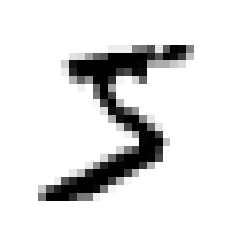

In [8]:
## visualising the data
import matplotlib as mpl

some_digit = X.iloc[0,:].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [9]:
y[0]

'5'

In [10]:
y = y.astype(np.uint8)

In [11]:
y.dtype

dtype('uint8')

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
# Fitiing the model

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)


from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [17]:
## Cross Validation

from sklearn.model_selection import cross_val_score
cv = cross_val_score(sgd_clf, X_train, y_train,cv = 3)

In [19]:
cv.mean()

0.8669666666666668

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

 


e:\machine_learning_projects\machine_learning\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

## Deciding the threshold for classification

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [32]:
y_scores.shape

(60000,)

In [33]:
y_test_5.shape

(10000,)

In [45]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [34]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
precision ,recall, threshold = precision_recall_curve(y_train_5, y_scores)

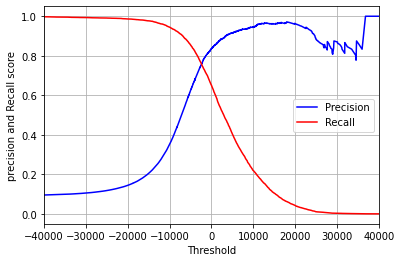

In [44]:
fig, ax = plt.subplots()
ax.plot(threshold, precision[:-1], label = 'Precision', c = 'blue' )
ax.plot(threshold, recall[:-1], label = 'Recall', c = 'red' )
ax.grid()
ax.set_xlim(-40000,40000)
ax.set_ylabel('precision and Recall score')
ax.set_xlabel('Threshold')
plt.legend()
plt.show()


In [47]:
## Choosing 8000 as threshold and calculating precision and recall

threshold_90_precision = threshold[np.argmax(precision >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90),recall_score(y_train_5, y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)